# Business Case 4 - Crypto_Forecasting

- Emanuele Aldera, m20210617
- Robin Schmidt, m20210602
- Muhammad Abdullah, m20210655
- Rui Ramos, m20210640

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from math import ceil 
# from datetime import datetime
# # %pip install abc_analysis
# from abc_analysis import abc_analysis
# from mlxtend.frequent_patterns import apriori, association_rules
# from tabulate import tabulate
# from functools import reduce
# from sklearn.decomposition import TruncatedSVD
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.neighbors import NearestNeighbors
# from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
close_price = pd.read_csv("data/close.csv", index_col="Date")
high = pd.read_csv("data/high.csv", index_col="Date")
low = pd.read_csv("data/low.csv", index_col="Date")
volume = pd.read_csv("data/volume.csv", index_col="Date")
open_price = pd.read_csv("data/open.csv", index_col="Date")
adj_close = pd.read_csv("data/adj_close.csv", index_col="Date")


In [3]:
crypto = pd.concat([open_price, close_price, high, low, volume, adj_close], axis=1, join="inner")

In [4]:
crypto

,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD,...,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-26,NaN,NaN,NaN,NaN,1265.989990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1281.079956,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,1281.880005,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1317.729980,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,1317.739990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1316.479980,NaN,NaN,NaN,NaN,NaN
2017-04-29,NaN,NaN,NaN,NaN,1317.839966,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1321.790039,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN,1321.869995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1347.890015,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,0.937272,24.290905,78.268646,46.146866,41371.515625,3077.829346,14.022598,94.938416,1.417712,105.497673,...,0.910474,23.305845,75.080742,45.097389,40527.363281,2987.480713,13.588746,90.799156,1.379862,101.776138
2022-04-22,0.910335,23.305815,75.084648,45.084476,40525.863281,2986.938721,13.587431,90.784470,1.379697,101.757423,...,0.907154,23.089931,74.122963,45.963348,39740.320312,2964.835693,13.609354,93.682289,1.399139,100.612053
2022-04-23,0.907185,23.089521,74.127480,45.955498,39738.722656,2964.802246,13.609134,93.669579,1.399106,100.619781,...,0.888503,23.271534,72.920013,45.180782,39486.730469,2938.114014,13.343726,89.534752,1.365971,100.744438


In [5]:
ada_usd = crypto["ADA-USD"]
atom_usd = crypto["ATOM-USD"]
avax_usd = crypto["AVAX-USD"]
axs_usd = crypto["AXS-USD"]
btc_usd = crypto["BTC-USD"]
eth_usd = crypto["ETH-USD"]
luna_usd = crypto["LUNA1-USD"]
matic_usd = crypto["MATIC-USD"]
sol_usd = crypto["SOL-USD"]
link_usd= crypto["LINK-USD"]

In [6]:
all_pairs = ['ADA-USD', 'ATOM-USD', 'AVAX-USD', 'AXS-USD', 'LUNA-USD', 'MATIC-USD', 'BTC-USD', 'ETH-USD', 'SOL-USD', "LINK-USD"]
close_price["LUNA-USD"] = close_price["LUNA1-USD"]
close_price.drop("LUNA1-USD", axis=1, inplace=True)

In [7]:
close_price

,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,MATIC-USD,SOL-USD,LUNA-USD
Date,,,,,,,,,,
2017-04-26,NaN,NaN,NaN,NaN,1281.079956,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,1317.729980,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,1316.479980,NaN,NaN,NaN,NaN,NaN
2017-04-29,NaN,NaN,NaN,NaN,1321.790039,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN,1347.890015,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-21,0.910474,23.305845,75.080742,45.097389,40527.363281,2987.480713,13.588746,1.379862,101.776138,90.799156
2022-04-22,0.907154,23.089931,74.122963,45.963348,39740.320312,2964.835693,13.609354,1.399139,100.612053,93.682289
2022-04-23,0.888503,23.271534,72.920013,45.180782,39486.730469,2938.114014,13.343726,1.365971,100.744438,89.534752


In [8]:
ada_usd.columns.values[0] = "Open Price"
ada_usd.columns.values[1] = "Close Price"
ada_usd.columns.values[2] = "Daily High"
ada_usd.columns.values[3] = "Daily Low"
ada_usd.columns.values[4] = "Volume"
ada_usd.columns.values[5] = "Adj Close"

atom_usd.columns.values[0] = "Open Price"
atom_usd.columns.values[1] = "Close Price"
atom_usd.columns.values[2] = "Daily High"
atom_usd.columns.values[3] = "Daily Low"
atom_usd.columns.values[4] = "Volume"
atom_usd.columns.values[5] = "Adj Close"

avax_usd.columns.values[0] = "Open Price"
avax_usd.columns.values[1] = "Close Price"
avax_usd.columns.values[2] = "Daily High"
avax_usd.columns.values[3] = "Daily Low"
avax_usd.columns.values[4] = "Volume"
avax_usd.columns.values[5] = "Adj Close"

axs_usd.columns.values[0] = "Open Price"
axs_usd.columns.values[1] = "Close Price"
axs_usd.columns.values[2] = "Daily High"
axs_usd.columns.values[3] = "Daily Low"
axs_usd.columns.values[4] = "Volume"
axs_usd.columns.values[5] = "Adj Close"

btc_usd.columns.values[0] = "Open Price"
btc_usd.columns.values[1] = "Close Price"
btc_usd.columns.values[2] = "Daily High"
btc_usd.columns.values[3] = "Daily Low"
btc_usd.columns.values[4] = "Volume"
btc_usd.columns.values[5] = "Adj Close"

eth_usd.columns.values[0] = "Open Price"
eth_usd.columns.values[1] = "Close Price"
eth_usd.columns.values[2] = "Daily High"
eth_usd.columns.values[3] = "Daily Low"
eth_usd.columns.values[4] = "Volume"
eth_usd.columns.values[5] = "Adj Close"

luna_usd.columns.values[0] = "Open Price"
luna_usd.columns.values[1] = "Close Price"
luna_usd.columns.values[2] = "Daily High"
luna_usd.columns.values[3] = "Daily Low"
luna_usd.columns.values[4] = "Volume"
luna_usd.columns.values[5] = "Adj Close"

link_usd.columns.values[0] = "Open Price"
link_usd.columns.values[1] = "Close Price"
link_usd.columns.values[2] = "Daily High"
link_usd.columns.values[3] = "Daily Low"
link_usd.columns.values[4] = "Volume"
link_usd.columns.values[5] = "Adj Close"

matic_usd.columns.values[0] = "Open Price"
matic_usd.columns.values[1] = "Close Price"
matic_usd.columns.values[2] = "Daily High"
matic_usd.columns.values[3] = "Daily Low"
matic_usd.columns.values[4] = "Volume"
matic_usd.columns.values[5] = "Adj Close"

sol_usd.columns.values[0] = "Open Price"
sol_usd.columns.values[1] = "Close Price"
sol_usd.columns.values[2] = "Daily High"
sol_usd.columns.values[3] = "Daily Low"
sol_usd.columns.values[4] = "Volume"
sol_usd.columns.values[5] = "Adj Close"

In [9]:
# btc_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\btc_usd.xlsx",sheet_name='btc_usd', index = True)

# eth_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\eth_usd.xlsx",sheet_name='eth_usd', index = True)

# ada_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\ada_usd.xlsx",sheet_name='ada_usd', index = True)

# atom_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\atom_usd.xlsx",sheet_name='atom_usd', index = True)

# avax_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\avax_usd.xlsx",sheet_name='avax_usd', index = True)

# axs_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\axs_usd.xlsx",sheet_name='axs_usd', index = True)

# luna_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\luna_usd.xlsx",sheet_name='luna_usd', index = True)

# matic_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\matic_usd.xlsx",sheet_name='matic_usd', index = True)

# sol_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\sol_usd.xlsx",sheet_name='sol_usd', index = True)

# link_usd.to_excel(r"C:\Users\muham\Downloads\Nova Ims\Business Cases in Data Science S2\Business-Cases\BC4\Data\link_usd.xlsx",sheet_name='link_usd', index = True)

In [10]:
def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
    

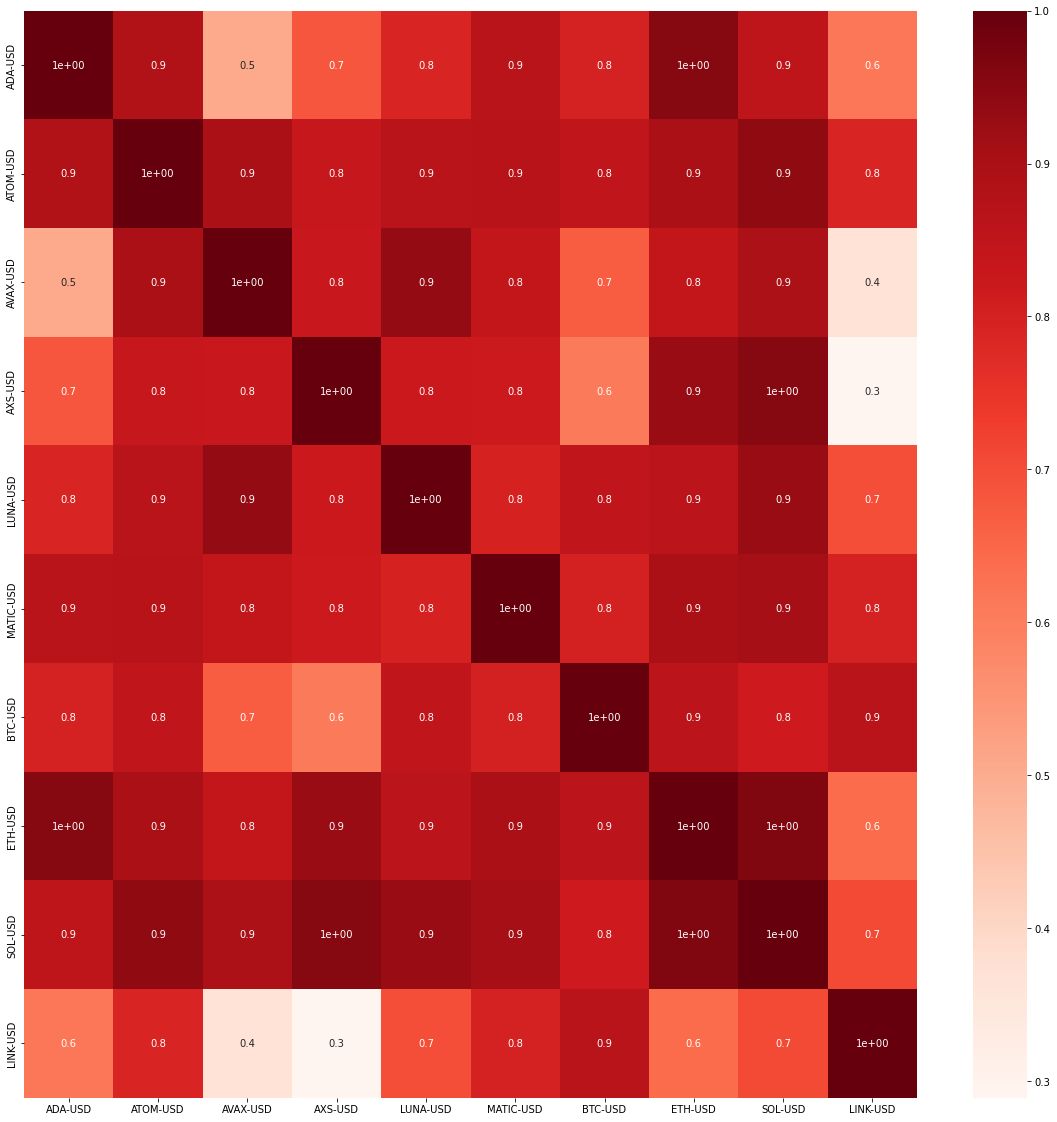

In [11]:
cor_heatmap(np.round(close_price[all_pairs].corr(method = "spearman"),3)) #######I AM NOT SURE WHICH TO USE PEARSON OR SPEARMAN (HAD LESS DIVERGENCE OF VALUES WITH PEARSON)

In [12]:
# IMPORTANT NOTE: We can adapt this similar plot for each type of currency 

df = pd.read_excel("data/btc_usd.xlsx", sheet_name="btc_usd")

fig = make_subplots(rows = 2, cols = 1)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,

    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad = 4
    )
)

fig = go.Figure(

    data=[go.Candlestick(
    x=df['Date'],
    open=df['Open Price'], high=df['Daily High'],
    low=df['Daily Low'], close=df['Close Price'],
    increasing_line_color= 'Green', decreasing_line_color= 'Red'
),
            go.Scatter(
                x = df["Date"], 
                y = df["Close Price"].rolling(window=20).mean(),
                mode = 'lines', 
                name = '20SMA',
                line = {'color': '#ff006a'}
            ),
            go.Scatter(
                x = df["Date"], 
                y = df["Close Price"].rolling(window=50).mean(),
                mode = 'lines',
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
    ,layout=layout)

fig2 = go.Figure(
            data = go.Bar(
                x = df["Date"],
                y = df["Volume"],
                marker_color = "red"
            )
)
fig.update_layout(
    title = f'The Candlestick graph for BTC-USD',
    xaxis_title = 'Date',
    yaxis_title = f'BTC-USD',
    xaxis_rangeslider_visible = False #DEFAULT TRUE, WHILE TAKING SCREENSHOT WE PUT IT TO FALSE
)
fig.update_yaxes(tickprefix='$')

fig2.update_layout(
    title = f'The Barchart graph showing volume for BTC',
    xaxis_title = 'Date',
    yaxis_title = 'Amount of asset traded during the day',
    xaxis_rangeslider_visible = False, #DEFAULT TRUE, WHILE TAKING SCREENSHOT WE PUT IT TO FALSE
    autosize=False,
    width=1000,
    height=1000,
)

fig.show()
fig2.show()

In [13]:
fig = go.Figure(
layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad = 4
    )
))

# Scatter
for idx, name in enumerate(close_price):
    fig = fig.add_trace(
        go.Scatter(
            x = close_price.index,
            y = close_price[name],
            name = name,
        )
    )

fig.update_layout(
    title = 'The Correlation between Different Cryptocurrencies',
    xaxis_title = 'Date',
    yaxis_title = f'Price',
    legend_title = 'Cryptocurrencies'
)

fig.update_yaxes(type='log', tickprefix='$')
fig.show()

## LTMS

https://medium.com/financial-data-analysis/multiple-cryptocurrencies-pricing-prediction-using-lstm-python-a8e864176604

In [14]:
# #last 2 months are for testing
# testing_window = 60       
# #using one year prices to predict
# x_window = 180
# #predicting two days in the future   
# time_shift = 2

In [15]:
# # Scaling MinMax prices for better LTSM performances

# train_idx = int((len(close_price) - testing_window - x_window)*0.8) + x_window
# sc = MinMaxScaler().fit(close_price.iloc[:train_idx, :])
# close_price.iloc[:, :] = sc.transform(close_price.iloc[:, :])

In [16]:
# datetime_list = close_price.index

# X = np.zeros((len(close_price)-x_window-time_shift+1, len(close_price.columns), x_window))
# Y = np.zeros((len(close_price)-x_window-time_shift+1, len(close_price.columns), 1))
# for i in range(X.shape[0]):
#     X[i] = np.array(close_price.iloc[i:i+x_window]).T
#     Y[i] = np.array(close_price.iloc[i+x_window+time_shift-1])[:,np.newaxis]

In [17]:
# X_train = X[:-testing_window]
# Y_train = Y[:-testing_window]
# X_test = X[-testing_window:]
# Y_test = Y[-testing_window:]
# val_idx = int(X_train.shape[0]*0.8)
# X_val = X_train[val_idx:]
# Y_val = Y_train[val_idx:]
# X_train = X_train[:val_idx]
# Y_train = Y_train[:val_idx]

In [18]:
# model = keras.Sequential([
#     layers.LSTM(64, input_shape=X.shape[1:], activation="relu", return_sequences=True),
#     layers.Dense(1),])

# opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.01, nesterov=True)

# model.compile(loss='mean_squared_error', optimizer=opt)

# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

# history = model.fit(X_train, Y_train, epochs=300, validation_data=(X_val, Y_val), shuffle=True, batch_size=8, verbose=1, callbacks=[callback])

In [19]:
# Y_pred = model.predict(X_test)[:, :, 0]
# pred_df = pd.DataFrame(sc.inverse_transform(Y_pred), columns=all_pairs, 
# index=list(datetime_list[-len(Y_pred):]))
# # pred_df = pred_df.rename_axis('Datetime').reset_index()
# pred_df

In [20]:
# import matplotlib.pyplot as plt
# temp_df = close_price.iloc[-testing_window*7:]
# fig = plt.figure(figsize=(30,30))
# fig.suptitle('Predicted Prices', fontsize=16, y = 0.92)
# for i in range(len(all_pairs)):
#     coin = all_pairs[i]
#     plt.subplot(5, 4, i+1)    
#     plt.plot(temp_df.index, temp_df[coin], color = 'k', alpha = 0.3)
#     plt.plot(pred_df.index, pred_df[coin], color = 'b', alpha = 0.5)
#     # plt.axvline(x=min(pred_df.index), color='k', linestyle=(0, (5, 5)))
#     plt.title(coin)
#     plt.xticks(range(0,450,45), rotation = 45)
# plt.show()

## LSTM

In [109]:
coin_name = "BITCOIN"
coin = btc_usd["Close Price"].copy()
coin.dropna(inplace = True, axis = 0) 
coin

Date
2017-04-26     1281.079956
2017-04-27     1317.729980
2017-04-28     1316.479980
2017-04-29     1321.790039
2017-04-30     1347.890015
                  ...     
2022-04-21    40527.363281
2022-04-22    39740.320312
2022-04-23    39486.730469
2022-04-24    39469.292969
2022-04-25    40458.308594
Name: Close Price, Length: 1826, dtype: float64

In [110]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(coin.values.reshape(-1,1))

In [111]:
prediction_days = 30
testing_days = 365
future_day = 0

In [112]:
X, y = [], []

In [113]:
for i in range(prediction_days, len(scaled) - future_day):
    X.append(scaled[i-prediction_days:i, 0])
    y.append(scaled[i + future_day, 0])

In [114]:
X_train = X[:-testing_days]
y_train = y[:-testing_days]

In [115]:
#(train) + (test) + (days to use to predict) = total dataset
len(X_train), testing_days, prediction_days, len(coin)

(1431, 365, 30, 1826)

In [116]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [117]:
y_train

array([0.01389952, 0.01143217, 0.0131962 , ..., 0.75148239, 0.73575072,
       0.71996131])

In [118]:
# Building and training the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
# Prevent overfitting
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units = 50))

model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [119]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
45/45 [==============================] - 10s 51ms/step - loss: 0.0075
Epoch 2/50
45/45 [==============================] - 2s 47ms/step - loss: 0.0018
Epoch 3/50
45/45 [==============================] - 2s 48ms/step - loss: 0.0016
Epoch 4/50
45/45 [==============================] - 2s 54ms/step - loss: 0.0013
Epoch 5/50
45/45 [==============================] - 2s 55ms/step - loss: 0.0016
Epoch 6/50
45/45 [==============================] - 2s 51ms/step - loss: 0.0015
Epoch 7/50
45/45 [==============================] - 2s 49ms/step - loss: 0.0013
Epoch 8/50
45/45 [==============================] - 2s 51ms/step - loss: 0.0016
Epoch 9/50
45/45 [==============================] - 2s 54ms/step - loss: 0.0012
Epoch 10/50
45/45 [==============================] - 3s 59ms/step - loss: 0.0011
Epoch 11/50
45/45 [==============================] - 2s 53ms/step - loss: 0.0012
Epoch 12/50
45/45 [==============================] - 2s 54ms/step - loss: 0.0014
Epoch 13/50
45/45 [=================

In [120]:
# Testing the model
actual_prices = coin[-testing_days:].values

# model_inputs = scaled[len(scaled) - prediction_days - testing_days:].values
# # model_inputs = scaler.fit_transform(model_inputs)
# model_inputs
X_test =  X[-testing_days:]

In [121]:
# X_test = []
# for i in range(prediction_days, len(model_inputs)):
#     X_test.append(model_inputs[i-prediction_days:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.82510092],
        [0.82475747],
        [0.85190438],
        ...,
        [0.75148239],
        [0.73575072],
        [0.71996131]],

       [[0.82475747],
        [0.85190438],
        [0.8695174 ],
        ...,
        [0.73575072],
        [0.71996131],
        [0.79565631]],

       [[0.85190438],
        [0.8695174 ],
        [0.86953461],
        ...,
        [0.71996131],
        [0.79565631],
        [0.81091394]],

       ...,

       [[0.64387677],
        [0.64972715],
        [0.65202173],
        ...,
        [0.60485549],
        [0.59207725],
        [0.58020376]],

       [[0.64972715],
        [0.65202173],
        [0.68701664],
        ...,
        [0.59207725],
        [0.58020376],
        [0.57637805]],

       [[0.65202173],
        [0.68701664],
        [0.69165583],
        ...,
        [0.58020376],
        [0.57637805],
        [0.57611499]]])

In [122]:
X_train.shape, X_test.shape, len(X)

((1431, 30, 1), (365, 30, 1), 1796)

In [123]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [124]:
predicted_prices = predicted_prices.tolist()
actual_prices = actual_prices.tolist()

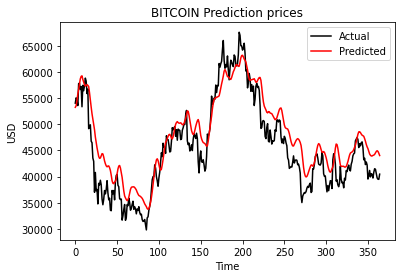

In [125]:
plt.plot(actual_prices, color = 'black')
plt.plot(predicted_prices, color = 'red')
plt.legend(labels = ["Actual", "Predicted"], loc = 'best')
plt.title(f"{coin_name} Prediction prices")
plt.xlabel("Time")
plt.ylabel("USD")
plt.show()

In [126]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

r2 = r2_score(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)

scores = pd.DataFrame(index = ["LSTM"])
scores["R2"] = r2
scores["MAPE"] = mape
scores["MAE"] = mae
scores["MSE"] = mse
scores

,R2,MAPE,MAE,MSE
LSTM,0.797222,0.075143,3160.403425,1.492474e+07


## Random Forest

In [ ]:
# Features construction 
df['Open-Close'] = df['Open Price'] - df['Close Price']/df['Open Price']
df['High-Low'] = df['Daily High'] - df['Daily Low']/df['Daily Low']
df['percent_change'] = df['Adj Close'].pct_change()
df['std_5'] = df['percent_change'].rolling(5).std()
df['ret_5'] = df['percent_change'].rolling(5).mean()
df.dropna(inplace=True)

# X is the input variable
X = df[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, -1)

In [ ]:
# Total dataset length
dataset_length = df.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

In [ ]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
clf = RandomForestClassifier(random_state=5)

In [ ]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [ ]:
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

In [ ]:
# Run the code to view the classification report metrics
report = classification_report(y_test, model.predict(X_test))
print(report)

In [ ]:
y_test

In [ ]:
df['strategy_returns'] = df.percent_change.shift(-1) * model.predict(X)

In [ ]:
df.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

In [ ]:
(df.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()